In [ ]:
# Python3 program to implement the 
# weighted K nearest neighbour algorithm.  
  
import math  
  
def weightedkNN(points,p,k=3):  
    '''  
    This function finds classification of p using  
    weighted k nearest neighbour algorithm. It assumes only two  
    two classes and returns 0 if p belongs to class 0, else  
    1 (belongs to class 1).  
  
    Parameters -  
        points : Dictionary of training points having two keys - 0 and 1  
            Each key have a list of training data points belong to that  
  
        p : A tuple ,test data point of form (x,y)  
  
        k : number of nearest neighbour to consider, default is 3  
    '''
  
    distance=[]  
    for group in points.keys(): # 0, 1
        for feature in points[group]:  
  
            #calculate the euclidean distance of p from training points  
            euclidean_distance = math.sqrt((feature[0]-p[0])**2 +(feature[1]-p[1])**2)  
  
            # Add a tuple of form (distance,group) in the distance list  
            distance.append((euclidean_distance,group))  # p와 0번 그룹 포인트 간의 거리를 리스트로 저장
                                                         # p와 1번 그룹 포인트 간의 거리를 리스트로 저장
    # sort the distance list in ascending order  
    # and select first k distances  
    distance = sorted(distance)[:k]  
  
    freq1 = 0 # weighted sum of group 0  
    freq2 = 0 # weighted sum of group 1  
  
    for d in distance: # 5개만 선택해서 
        if d[1] == 0: 
            freq1 += (1 / d[0]) 
              
        elif d[1] == 1:  
            freq2 += (1 /d[0]) 
              
  
    return 0 if freq1>freq2 else 1
  
# Driver function  
def main():  
  
    # Dictionary of training points having two keys - 0 and 1  
    # key 0 have points belong to class 0  
    # key 1 have points belong to class 1  
  
    points = {0:[(0, 4),(1, 4.9),(1.6, 5.4),(2.2, 6),(2.8, 7),(3.2, 8),(3.4, 9)],  
              1:[(1.8, 1),(2.2, 3),(3, 4),(4, 4.5),(5, 5),(6, 5.5)]}  
  
    # query point p(x,y)  
    p = (2, 4)  
  
    # Number of neighbours  
    k = 5
  
    print("The value classified to query point is: {}".format(weightedkNN(points,p,k)))  
  
if __name__ == '__main__':  
    main() 

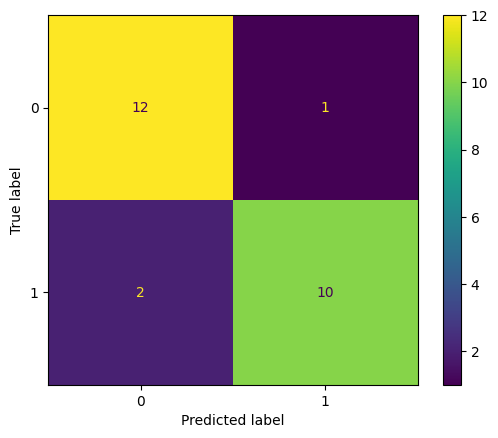

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()